# **菊安酱与菜菜的Python机器学习可视化**

## 第三期 排序图 (1)

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## <center>每周三晚上8点直播1小时，完整版2小时周日上线~</center>
## <center>单数周菜菜直播，双数周菊安酱直播，哔哩哔哩与peixun.net同步开启</center>

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## **第三章 排序图 Ranking**

排序图是Python可视化中最简单的图像之一，它的主要作用是帮助我们比较变量的大小<br>
典型的排序图有：柱状图，坡度图，哑铃图……

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week3%20Ranking/%E5%85%B8%E5%9E%8B%E7%9A%84%E6%8E%92%E5%BA%8F%E5%9B%BE.PNG" align="center" />

### 我们什么时候会需要排序图呢？
1. 数据报告 & 学术研究：<br>
>对比大小：不同年龄的客户的成交率，不同生产成本对应的生产员工技能要求<br>
>时间进程：表现某个数据在某个时间点之前的样子，和某个时间点之后的样子的对比
2. 数据探索 & 数据解读：<br>
>探索数据关系，帮助了解事实，推动研究<br>

### 15/50 有序的柱状图

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week3%20Ranking/orderedbarchart.PNG" align="center" />

横坐标：车辆品牌<br>
纵坐标：城市里程/加仑<br>

### 1. 导入需要的绘图库

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#如果你在使用Jupyter Notebook，你会需要这样一句命令来让你的图像显示

### 2. 先来认识一下绘制柱状图的函数

#### **plt.vlines()**: vertical line，就是绘制竖线的函数

> **重要参数**
>> x：横坐标  
>> ymin：条形图在y轴上的起点，也就是长条的最下边  
>> ymax：条形图在y轴上的终点，也就是长条的最上边  

In [3]:
X = [1,2,3,4,5]
y = [14,13,20,19,7]

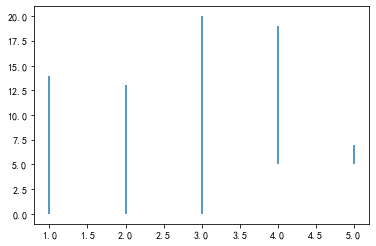

In [4]:
plt.vlines(x=X, ymin=[0,0,0,5,5], ymax=y);

In [5]:
#让线条变宽，就成了柱子

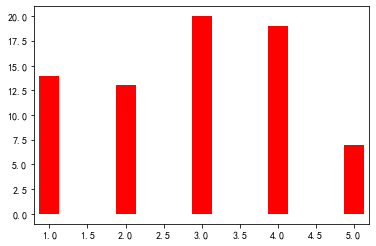

In [6]:
plt.vlines(x=X, ymin=0,ymax=y
           ,linewidth = 20 #调节线宽，默认为2
           ,colors='red'
           ,linestyles = "solid" #调节线型
          );
#{'solid', 'dashed', 'dashdot', 'dotted'}

In [7]:
#希望数据有序？那就对数据排个序

In [8]:
y

[14, 13, 20, 19, 7]

In [9]:
y.sort() #会改变原有的对象

In [10]:
y

[7, 13, 14, 19, 20]

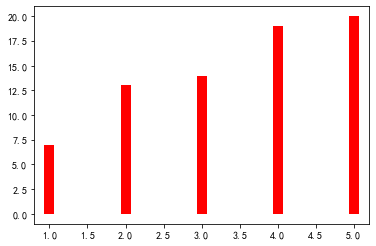

In [11]:
plt.vlines(x=X,ymin=0,ymax=y,linewidth=10,colors="red");

### 3. 认识数据，准备数据

In [12]:
#导入数据
df_raw = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\mpg_ggplot2.csv")

In [13]:
df_raw

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [14]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
        ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

#驱动类型：四轮，前轮，后轮
#能源种类：汽油，柴油，用电等等
#车辆种类：皮卡，SUV，小型，中型等等
#城市里程/加仑，公路里程/加仑：表示使用每加仑汽油能够跑的英里数，所以这个数值越大代表汽车越节能

In [15]:
#你是否注意到，一个车辆品牌下有不同的车型，每个车型都有自己的城市里程/加仑，所以不同的车辆品牌对应着许多个不同的城市里程
#而我们的图像中却是一个品牌一个柱子：这其实是每一个车辆品牌下所有车型的城市里程/加仑的均值

In [16]:
df_raw[["cty","manufacturer"]]

,cty,manufacturer
0,18,audi
1,21,audi
2,20,audi
3,21,audi
4,16,audi
...,...,...
229,19,volkswagen
230,21,volkswagen
231,16,volkswagen
232,18,volkswagen


In [17]:
#提取出我们需要的数据：使用groupby聚合每个品牌的车辆，求每个品牌下的城市里程/加仑的均值

df = df_raw[["cty","manufacturer"]].groupby("manufacturer").mean()
df

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


In [19]:
#对数据进行排序
df.sort_values('cty', inplace=True)

In [20]:
df

,cty
manufacturer,
lincoln,11.333333
land rover,11.500000
dodge,13.135135
mercury,13.250000
jeep,13.500000
ford,14.000000
chevrolet,15.000000
pontiac,17.000000
audi,17.611111


In [21]:
df.reset_index(inplace=True) #reset_index，将DataFrame的索引恢复到原有的0~n，将原本左右索引的特征恢复成普通的特征

In [22]:
df

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000
5,ford,14.000000
6,chevrolet,15.000000
7,pontiac,17.000000
8,audi,17.611111
9,nissan,18.076923


In [23]:
df.index

RangeIndex(start=0, stop=15, step=1)

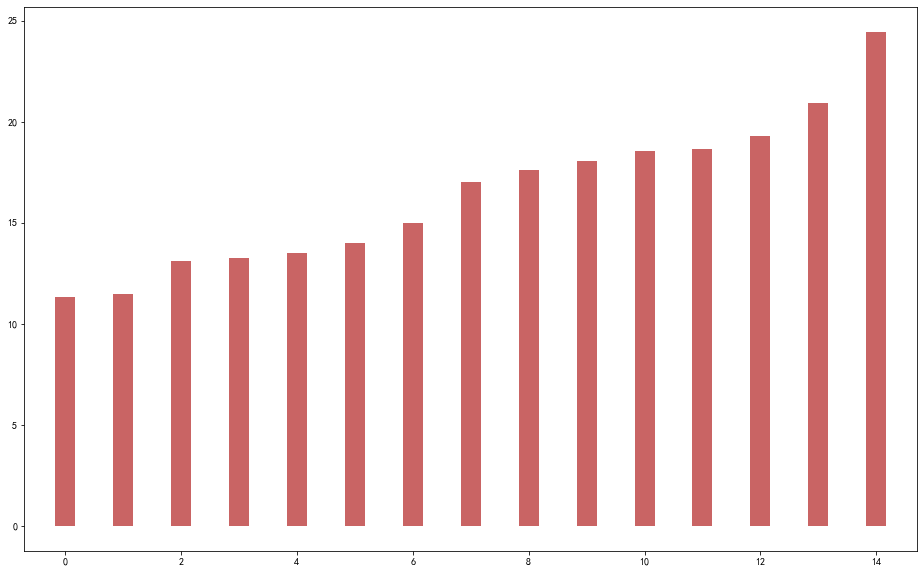

In [24]:
#使用数据绘制出图像
plt.figure(figsize=(16,10)) #建立画布
plt.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20);

以下是源代码……

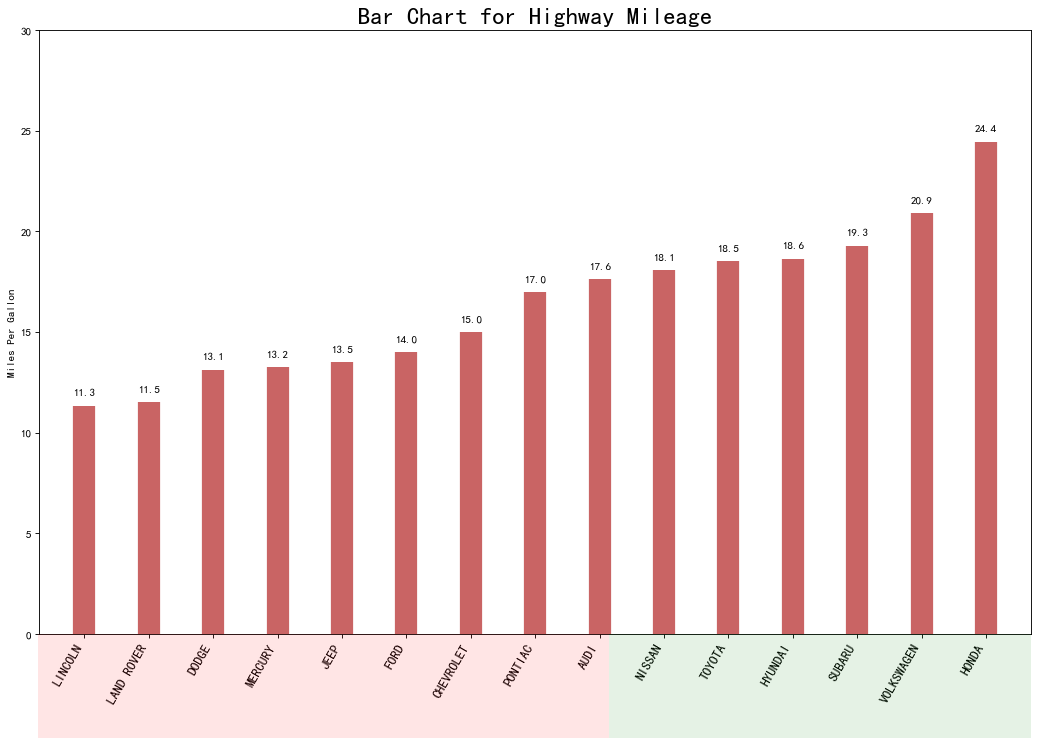

In [28]:
# Prepare Data
df_raw = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')

# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

In [27]:
#来一步步看看原有的代码都是在做什么吧

### 4. 构建画布和子图

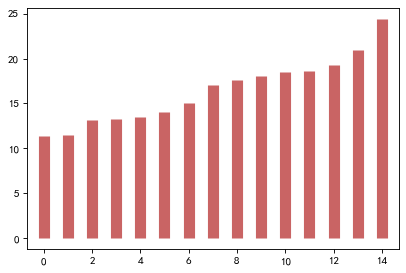

In [27]:
#构建子图和画布
fig, ax = plt.subplots(figsize=(6,4) #图像的尺寸
                       ,facecolor="white" #画布的颜色
                       #, facecolor='black' #画布的填充色
                       , dpi = 80
                      )

ax.vlines(x=df.index, ymin=0, ymax=df.cty
          , color='firebrick', alpha=0.7, linewidth=10);

#### **plt.subplots**

> 生成两个对象：
>> fig：画布，类似于绘画中的一张白纸，可以包括多个子图，没有画布的画图像无法显示  
>> ax：子图对象，呈现在画布fig上的绘图对象，所有的绘图函数都需要在子图ax上来进行

这和我们传统的plt.vlines有什么区别呢？

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week3%20Ranking/%E9%9D%A2%E5%90%91%E5%AF%B9%E8%B1%A1.PNG" align="center" />

plt是命令式绘图，绘制出的是一张完整的图像，我们无法单独从plt生成的图像中调用背景或者坐标轴这些存在作为对象来进行编辑<br>
而fig和ax是面向对象的绘图，绘制出的是一个个类似于图层的对象<br>
这些对象包括画布（fig），画布上一个或多个子图（Axes），子图上的坐标轴（axis），图例（legend）等等，统称为Artist  
我们看到的二维图像是所有这些对象叠加在一起的效果，我们可以单独调用任意对象来进行编辑<br>
<br>
对一张图来说，ax画在fig上，ax是一张图中包括坐标轴内的部分和图像的标题等等的这些部分<br>
fig是背景，但由于被子图ax挡住了，所以显示出的是坐标轴外的部分<br>
plt中的函数都可以用于子图对象ax，比如plt.vlines放到子图上之后，就是ax.vlines，表示在ax这个子图上画竖线（柱状图）

#### <font color=red>**如果我们希望单独调用图像的某一部分，则必须使用fig+ax的方法。但事实上，在工作中可视化的时候这种需求其实不多，用哪一种方式，或者混用两种方式不会有太大影响（可能会逼疯你身边科班出生的严谨程序员，然而对数据分析师来说，fine）。**</font><br>

### 5. 为条形图添加注解

In [29]:
df

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000
5,ford,14.000000
6,chevrolet,15.000000
7,pontiac,17.000000
8,audi,17.611111
9,nissan,18.076923


In [30]:
[*enumerate(df.cty)]

[(0, 11.333333333333334),
 (1, 11.5),
 (2, 13.135135135135135),
 (3, 13.25),
 (4, 13.5),
 (5, 14.0),
 (6, 15.0),
 (7, 17.0),
 (8, 17.61111111111111),
 (9, 18.076923076923077),
 (10, 18.529411764705884),
 (11, 18.642857142857142),
 (12, 19.285714285714285),
 (13, 20.925925925925927),
 (14, 24.444444444444443)]

In [32]:
round(5.33333,1) #保留小数位数

5.3

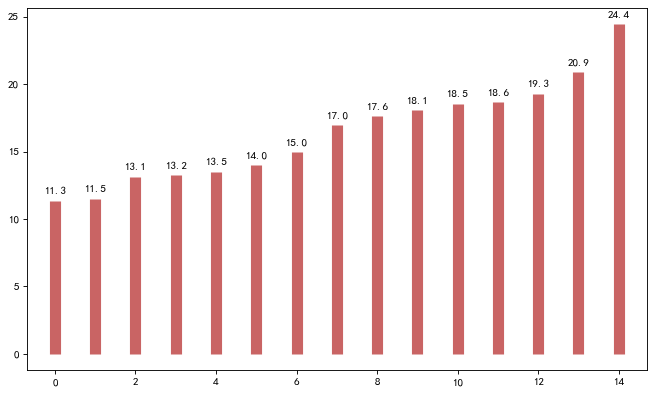

In [31]:
fig, ax = plt.subplots(figsize=(10,6),facecolor="white",dpi = 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=10);
#没有画布和子图后续的图像都无法显示

#=========================

#使用text函数给每一个柱子添加注解
#text函数一次只能为一个柱子添加注解，因此需要循环
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5 #注释所在的横纵坐标
            , round(cty, 1) #这第三个参数是什么呢？函数round是用来四舍五入的函数，可以选择保留小数的位数
            , horizontalalignment='center' #相对于我们规定的x和y坐标，文字显示在哪里
           )

### 6. 装饰图像

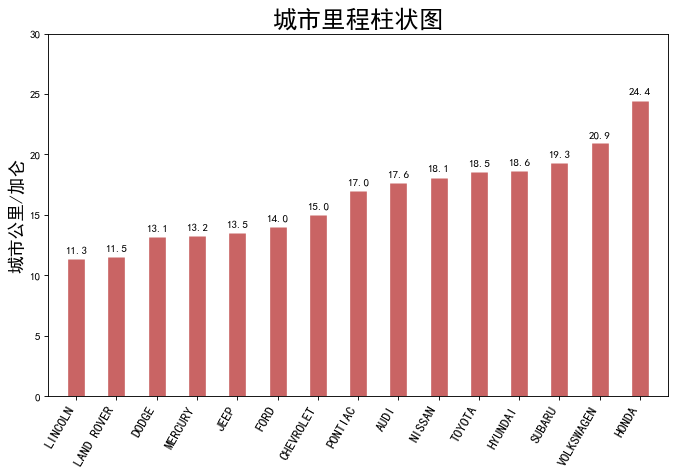

In [36]:
fig, ax = plt.subplots(figsize=(10,6),facecolor="white",dpi = 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=15);

plt.rcParams['font.sans-serif']=['Simhei']
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')

#========================

#装饰图像：标题，标尺的大小，y轴的名字
ax.set_title('城市里程柱状图', fontdict={'size':22}) #font字体
ax.set(ylabel='城市公里/加仑', ylim=(0, 30))
ax.set_ylabel("城市公里/加仑",fontdict={"size":16})

#函数xticks所带有的功能就比ax.set_xticks要多，因此我们在这里使用plt
plt.xticks(df.index #显示在横坐标上的位置
           , df.manufacturer.str.upper() #要显示的标尺的内容
           , rotation=60 #是否进行旋转
           , horizontalalignment='right' #你设置的这个xy的位置相对于你输入的文字所在的位置
           , fontsize=12);

In [40]:
df.manufacturer.str

In [35]:
df.manufacturer.str.upper()

0        LINCOLN
1     LAND ROVER
2          DODGE
3        MERCURY
4           JEEP
5           FORD
6      CHEVROLET
7        PONTIAC
8           AUDI
9         NISSAN
10        TOYOTA
11       HYUNDAI
12        SUBARU
13    VOLKSWAGEN
14         HONDA
Name: manufacturer, dtype: object

### 7. 其他面向对象进行的操作

与我们的最终目标相比，我们还差两个横坐标下方的矩形  
我们的思路是：**首先绘制出一个矩形对象，然后将这个矩形对象添加到我们的画布上去**  
绘制矩形对象所使用的模块是patches，这个模块是“补丁”的意思，我们可以使用这个模块中的函数创造各种几何对象  
比如说，用patches.Rectangle来绘制长方形

当有了长方形对象之后，我们再使用对画布添加对象的命令add_artist，将矩形添加到我们的图像中
#### add_artist()

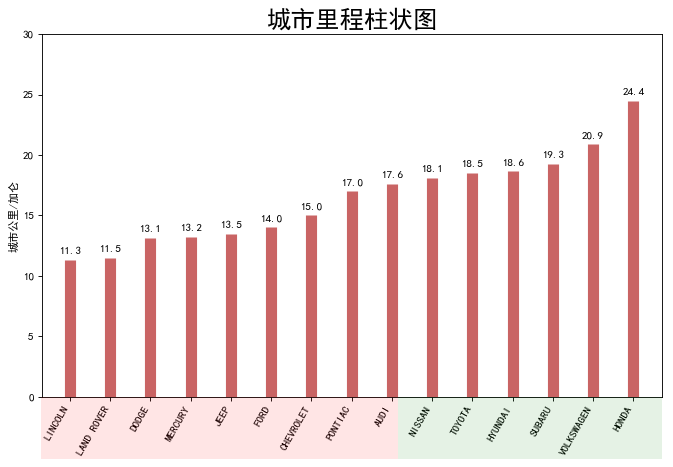

In [77]:
fig, ax = plt.subplots(figsize=(10,6)
                       ,facecolor="white"
                       #,facecolor="lightblue"
                       ,dpi = 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=10);

for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')

plt.rcParams['font.sans-serif']=['Simhei']
ax.set_title('城市里程柱状图', fontdict={'size':22})
ax.set(ylabel='城市公里/加仑', ylim=(0, 30))

plt.xticks(df.index
           , df.manufacturer.str.upper()
           , rotation=60
           , horizontalalignment='right'
           , fontsize=10);

#========================
import matplotlib.patches as patches
#对x轴加上颜色

#构建长方形
p1 = patches.Rectangle((0.57, -0.005) #长方形所在的左下角的坐标x,y，长方形在哪个位置
                       , width=.33 #长方形的宽（与x轴平行的那一段）
                       , height=.13 #长方形的高（与y轴平行的那一段）
                       , alpha=0.1 #透明度
                       , facecolor='green' #矩形的颜色
                       , transform=fig.transFigure #确保矩形显示在图像最上方，如果我们对fig作画，不会被ax挡住
                      )
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1) #将多边形添加到对象fig(画布)
fig.add_artist(p2)
plt.show()

#### 问题1：矩形的位置和长宽是怎样确定的？

如果我们现在，希望在Nissan和Toyota的柱子之间画一个矩形，你会怎么画呢？  
仔细研究patches.Rectangle()函数的参数x和y，会发现x和y中填写的坐标所依赖的坐标轴与我们眼睛看到的图像坐标轴并不一致  
这给我们确定矩形具体添加的位置增加了难度——眼睛能够看见的参照系不管用  
同样的，我们输入的宽和高也不是按照图像坐标轴的长度来的，不过我们可以发现，他们都是小于1的某一个数  
我们可以通过找0,0和1,1两个点，来确认Rectangle参照的坐标轴究竟在哪里

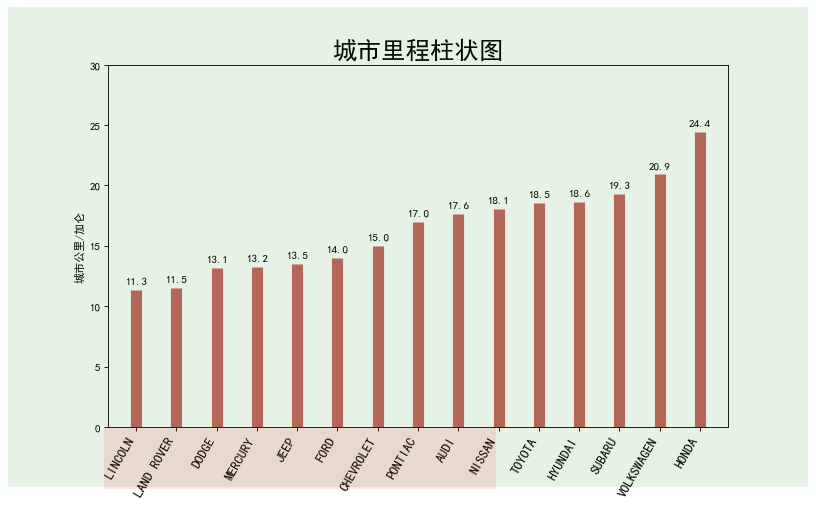

In [41]:
fig, ax = plt.subplots(figsize=(10,6)
                       ,facecolor="white"
                       #,facecolor="lightblue"
                       ,dpi = 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=10);

for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')

plt.rcParams['font.sans-serif']=['Simhei']
ax.set_title('城市里程柱状图', fontdict={'size':22})
ax.set(ylabel='城市公里/加仑', ylim=(0, 30))

plt.xticks(df.index
           , df.manufacturer.str.upper()
           , rotation=60
           , horizontalalignment='right'
           , fontsize=12);

#========================
import matplotlib.patches as patches
#对x轴加上颜色

p1 = patches.Rectangle((0, 0) #长方形所在的左下角的坐标x,y
                       , width=1 #长方形的宽（与x轴平行的那一段）
                       , height=1 #长方形的高（与y轴平行的那一段）
                       , alpha=.1 #透明度
                       , facecolor='green' #矩形的颜色
                       , transform=fig.transFigure #进行对象的转换，fig.transFigure表示根据矩形所在的位置进行对象转换，以确保矩形显示在图像最上方
                      )
#调整成这样，看到画长方体时参照的坐标轴在哪里了吗？试试看把fig的填充色修改一下，观察一下这个坐标系和画布的范围有多少重叠

p2 = patches.Rectangle((0.12, -0.005), width=.49, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

绘制图像的Rectangle参照的位置几乎是fig的大小，fig的左下角为(0,0)，宽和高都是依赖于画布的大小设置的比例，画布最宽的地方和最高的地方分别为1  
我们可以通过绘制从(0,0)开始，长宽都为1的长方体来探索画布究竟有多大  
然后再依赖于画布来估计长方形应该在的位置

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

#### 小题目掉落：请使用Rectangle和add_artist，画出Nissan和Toyota柱子之间，和Nissan的柱形图一样高的长方体

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week3%20Ranking/%E5%B0%8F%E9%A2%98%E7%9B%AE.PNG" align="center" />

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

#### 问题2：之前学过add_patch，那add_patch是否能用呢？

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/02%20%E6%B0%94%E6%B3%A1%E5%9B%BE3.PNG" align="center" />

在完整版课程中讲解这张图像中如何绘制凸包的时候，我们曾经用到功能patches  
我们使用patches绘制了多边形，并且用ax.add_patch功能将多边形添加到图像上  
那我们现在，是否也可以使用add_patch呢？

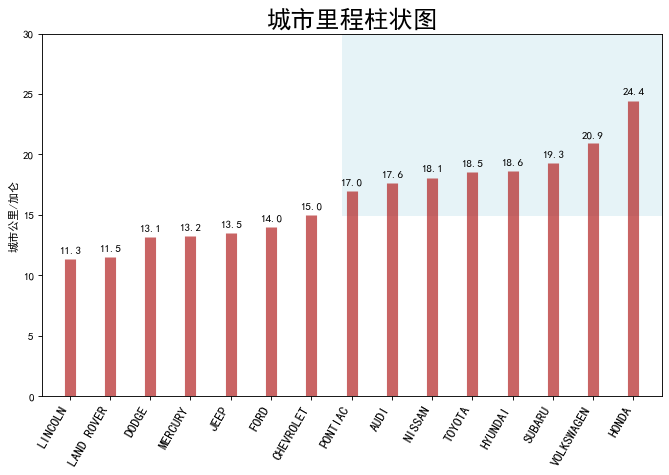

In [42]:
fig, ax = plt.subplots(figsize=(10,6)
                       ,facecolor="white"
                       #,facecolor="lightblue"
                       ,dpi = 80)

ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=10);

for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')

plt.rcParams['font.sans-serif']=['Simhei']
ax.set_title('城市里程柱状图', fontdict={'size':22})
ax.set(ylabel='城市公里/加仑', ylim=(0, 30))

plt.xticks(df.index
           , df.manufacturer.str.upper()
           , rotation=60
           , horizontalalignment='right'
           , fontsize=12);

import matplotlib.patches as patches
p1 = patches.Rectangle((0.57, -0.005), width=0.33, height=0.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)

#fig.add_artist(p1)
#fig.add_artist(p2)
#========================

#ax.add_patch(p1)
#ax.add_patch(p2)

#你会发现p1和p2都显示不出来，为什么？试试看P0

p0 = patches.Rectangle((0.5,0.5), width=0.5, height=0.5, alpha=0.3, facecolor='lightblue', transform=fig.transFigure)

# ax.add_patch(p0) #能够添加，但只对子图有效
#fig.add_patch(p0) #会报错，不能使用
#fig.add_artist(p0) #能够添加，对整个图像都有效
#ax.add_artist(p0) #能够添加，但只对子图有效

plt.show()

ax.add_patch作用的对象是ax，也就是坐标轴内的范围和标题/坐标轴的名称这些字，但不包括这些名称后面的画布  
因此ax.add_patch只能对坐标轴内的范围有效，因此当我们想对轴外的范围（画布的领域）进行操作的时候，我们需要对fig进行操作  
但很遗憾的是，fig上没有add_patch功能，因此我们只能够add_artist了  

相对的，ax上却可以使用add_artist，其功能和add_patch一模一样，只在轴内显示图像

### 8. 解读图像

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

*小题目答案* ：p3 = patches.Rectangle((.62, 0.12), width=.05, height=0.46, alpha=.1, facecolor='red', transform=fig.transFigure)

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 16 & 17/50 棒棒糖图与包点图

除了长相不一样，本质和排序的条形图一模一样的图像……

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week3%20Ranking/16%2617.PNG" align="center" />

棒棒糖图：
> 横坐标：车辆品牌  
> 纵坐标：城市里程/加仑

包点图：
> 横坐标：城市里程/加仑  
> 纵坐标：车辆品牌

In [43]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
#准备数据
df_raw = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

In [45]:
df

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000
5,ford,14.000000
6,chevrolet,15.000000
7,pontiac,17.000000
8,audi,17.611111
9,nissan,18.076923


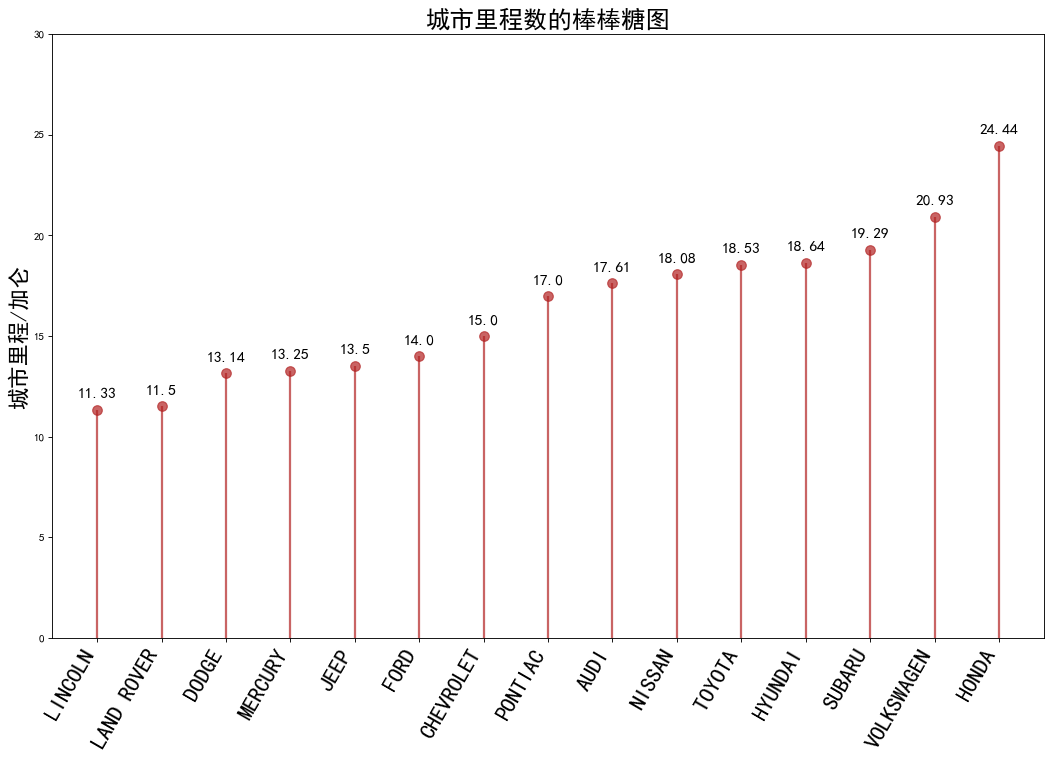

In [49]:
#画棒棒糖
fig, ax = plt.subplots(figsize=(16,10), dpi=80)

#先画竖线作为柱子
ax.vlines(x=df.index, ymin=0, ymax=df.cty
          , color='firebrick', alpha=0.7, linewidth=2)

#在竖线顶端画上散点作为糖
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

#设置标题，横纵坐标的范围，横纵坐标的标题等等
plt.rcParams['font.sans-serif']=['Simhei']
ax.set_title('城市里程数的棒棒糖图', fontdict={'size':22})
ax.set_ylabel('城市里程/加仑',fontsize=20)
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':20})
#plt.xticks
ax.set_ylim(0, 30)

#为每颗棒棒糖放上注释
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

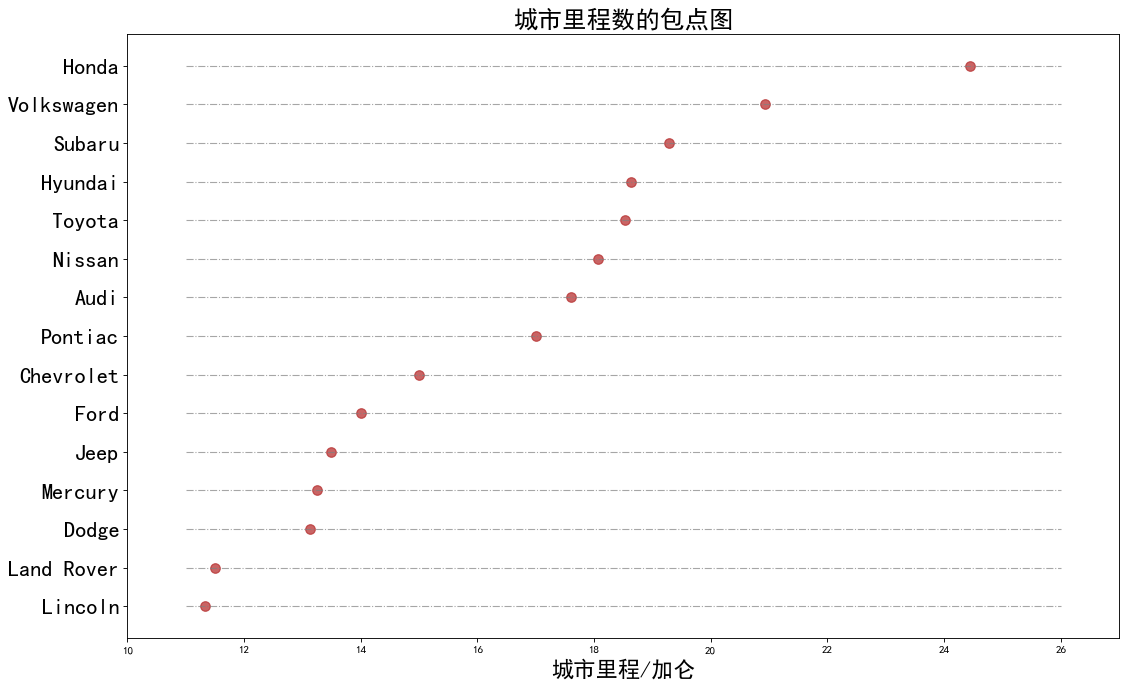

In [125]:
#画包点图
fig, ax = plt.subplots(figsize=(16,10), dpi=80)

#用绘制横线（而不是竖线）的函数hlines画出虚线
ax.hlines(y=df.index #纵坐标上显示的位置
          , xmin=11 #为了要让虚线布满屏幕，所以是从比城市里程/加仑的最小值低一些的地方开始
          , xmax=26 #到比城市里程/加仑的最大值高一些的地方结束
          , color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')

#在虚线上绘制出散点
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7) 

#装饰图像
ax.set_title('城市里程数的包点图', fontdict={'size':22})
ax.set_xlabel('城市里程/加仑',fontsize=20)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right',"size":20})
ax.set_xlim(10, 27) #X轴现在才是城市里程/加仑，取值范围要在城市里程的最大值和最小值之间
plt.show()

In [50]:
df["cty"]

0     11.333333
1     11.500000
2     13.135135
3     13.250000
4     13.500000
5     14.000000
6     15.000000
7     17.000000
8     17.611111
9     18.076923
10    18.529412
11    18.642857
12    19.285714
13    20.925926
14    24.444444
Name: cty, dtype: float64

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />